In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

C:\Users\bruce.stoutenburg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [10]:
my_act = lambda x:x-1.4231*torch.cos(x)+0.0605061*torch.cos(3*x)-0.340759*torch.sin(2*x)+0.00515677*torch.sin(4*x)

In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.L1 = nn.Linear(10,880,bias=False)
        self.L2 = nn.Linear(880,1,bias=False)

    def forward(self, x):
        l1 = self.L1(x)
        l2 = my_act(l1)
        return self.L2(l2)

In [8]:
model = Net()

In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.1)

In [10]:
X = np.random.randn(100000,10)
y=(np.sin(X)/np.exp(X)).sum(axis=1)
X=torch.tensor(X).float()
y=torch.tensor(y).float()

In [11]:
X_eval = np.random.randn(1000,10)
y_eval=(np.sin(X_eval)/np.exp(X_eval)).sum(axis=1)
X_eval=torch.tensor(X_eval).float()
y_eval=torch.tensor(y_eval).float()

In [41]:
rate=.001
for epoch in range(500):
    for i in range(100):
        inputs = X[i*1000:i*1000+1000]
        targets = y[i*1000:i*1000+1000]
        optimizer.zero_grad()
        yhat = model(inputs)
        loss = criterion(yhat.ravel(), targets)
        loss.backward()
        optimizer.step()
    all_yhat = model(X_eval)
    overall_loss = criterion(all_yhat.ravel(),y_eval)
    print(overall_loss,rate)

tensor(0.9176, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9168, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9159, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9151, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9143, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9135, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9126, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9118, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9110, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9102, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9094, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9086, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9078, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9070, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9062, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9054, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9047, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9039, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9031, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9023, grad_fn=<MseLossBackward0>) 0.001
tensor(0.9015, grad_

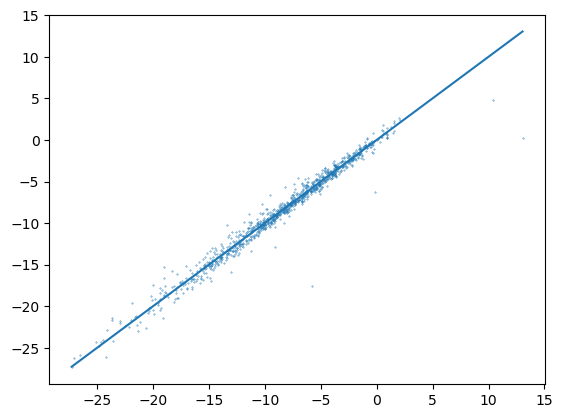

In [43]:
nn_preds = all_yhat.detach().numpy()
y_eval_np = y_eval.numpy()
plt.scatter(y_eval_np,nn_preds,s=.1)
plt.plot([y_eval_np.min(),y_eval_np.max()],[y_eval.min(),y_eval.max()])
plt.show()

In [35]:
model_xg = xgb.XGBRegressor(objective='reg:squarederror',
                            verbosity=2).fit(X.numpy(),y.numpy())

[15:47:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:47:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:47:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:47:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:47:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:47:57] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:

[15:48:06] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[15:48:06] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


In [36]:
preds = model_xg.predict(X_eval.numpy())

In [37]:
print(((preds-y_eval_np)**2).mean())

1.5166327


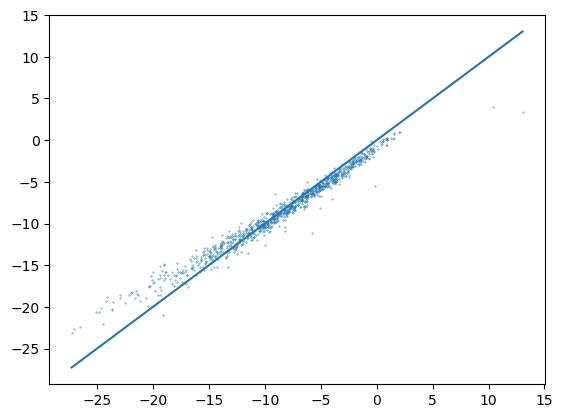

In [22]:
plt.scatter(y_eval_np,preds,s=.1)
plt.plot([y_eval_np.min(),y_eval_np.max()],[y_eval.min(),y_eval.max()])
plt.show()

In [88]:
class Net_relu(nn.Module):
    def __init__(self):
        super(Net_relu, self).__init__()
        self.L1 = nn.Linear(10,880,bias=False)
        self.L2 = nn.Linear(880,1,bias=False)
        self.act = nn.ReLU()

    def forward(self, x):
        l1 = self.L1(x)
        l2 = self.act(l1)
        return self.L2(l2)

In [89]:
model_r = Net_relu()

In [90]:
optimizer_relu = torch.optim.SGD(model_r.parameters(), lr=.001, momentum=0.1)

In [100]:
for epoch in range(500):
    for i in range(100):
        inputs = X[i*1000:i*1000+1000]
        targets = y[i*1000:i*1000+1000]
        optimizer_relu.zero_grad()
        yhat = model_r(inputs)
        loss = criterion(yhat.ravel(), targets)
        loss.backward()
        optimizer_relu.step()
    all_yhat = model_r(X_eval)
    overall_loss = criterion(all_yhat.ravel(),y_eval)
    print(overall_loss,rate)

tensor(3.9396, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9388, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9381, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9373, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9369, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9362, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9356, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9349, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9345, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9339, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9335, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9328, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9323, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9320, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9313, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9310, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9303, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9299, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9293, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9290, grad_fn=<MseLossBackward0>) 0.001
tensor(3.9284, grad_

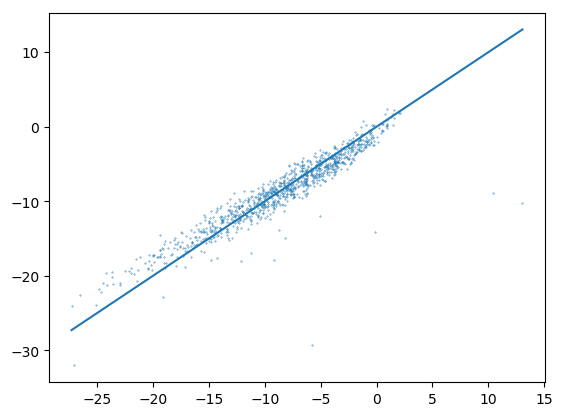

In [101]:
nn_relu_preds = all_yhat.detach().numpy()
y_eval_np = y_eval.numpy()
plt.scatter(y_eval_np,nn_relu_preds,s=.1)
plt.plot([y_eval_np.min(),y_eval_np.max()],[y_eval.min(),y_eval.max()])
plt.show()

# Real Data with CIFAR10

In [2]:
import torchvision
import torchvision.datasets as datasets

In [3]:
cifar_trainset = datasets.CIFAR10(root='./data', train=True, 
                                  transform=torchvision.transforms.Compose([ torchvision.transforms.ToTensor() ]))
cifar_testset = datasets.CIFAR10(root='./data', train=False, 
                                 transform=torchvision.transforms.Compose([ torchvision.transforms.ToTensor() ]))

In [4]:
class Net_cnn_my_act(nn.Module):
    def __init__(self):
        super(Net_cnn_my_act,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)#3x32x32->6x28x28 after pooling ->6x14x14
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)#6x14x14->16x10x10 after pooling 16x5x5
        self.lin1 = nn.Linear(400, 120)#16*5*5=400
        self.lin2 = nn.Linear(120, 84)
        self.lin3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(my_act(self.conv1(x)))
        x = self.pool(my_act(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = my_act(self.lin1(x))
        x = my_act(self.lin2(x))
        x = self.lin3(x)
        return x

In [5]:
my_cnn = Net_cnn_my_act()

In [6]:
train_loader = torch.utils.data.DataLoader(cifar_trainset,batch_size=64, shuffle=True)

In [7]:
my_cnn_optimizer = torch.optim.SGD(my_cnn.parameters(), lr=.0015, momentum=0.2)
cnn_loss = torch.nn.CrossEntropyLoss()

In [8]:
test_loader = torch.utils.data.DataLoader(cifar_testset,batch_size=10000, shuffle=False)

In [30]:
for epoch in range(50):
    for (batch_idx, batch) in enumerate(train_loader):
        (X, Y) = batch
        my_cnn_optimizer.zero_grad()
        preds = my_cnn(X)
        loss_val = cnn_loss(preds, Y)
        loss_val.backward()
        my_cnn_optimizer.step() 
        print(batch_idx,end='\r')
    for d in test_loader:
        (X, Y) = d 
        preds = my_cnn(X)
        loss_val = cnn_loss(preds, Y)
        print(loss_val)

tensor(2.1084, grad_fn=<NllLossBackward0>)
tensor(1.9808, grad_fn=<NllLossBackward0>)
tensor(1.8727, grad_fn=<NllLossBackward0>)
tensor(1.7863, grad_fn=<NllLossBackward0>)
tensor(1.7275, grad_fn=<NllLossBackward0>)
tensor(1.8769, grad_fn=<NllLossBackward0>)
tensor(1.6056, grad_fn=<NllLossBackward0>)
tensor(1.6736, grad_fn=<NllLossBackward0>)
tensor(1.5350, grad_fn=<NllLossBackward0>)
tensor(1.5417, grad_fn=<NllLossBackward0>)
tensor(1.5371, grad_fn=<NllLossBackward0>)
tensor(1.4698, grad_fn=<NllLossBackward0>)
tensor(1.4350, grad_fn=<NllLossBackward0>)
tensor(1.4760, grad_fn=<NllLossBackward0>)
tensor(1.4282, grad_fn=<NllLossBackward0>)
tensor(1.3852, grad_fn=<NllLossBackward0>)
tensor(1.3651, grad_fn=<NllLossBackward0>)
tensor(1.3795, grad_fn=<NllLossBackward0>)
tensor(1.3661, grad_fn=<NllLossBackward0>)
tensor(1.3656, grad_fn=<NllLossBackward0>)
tensor(1.3683, grad_fn=<NllLossBackward0>)
tensor(1.3248, grad_fn=<NllLossBackward0>)
tensor(1.3463, grad_fn=<NllLossBackward0>)
tensor(1.30

In [32]:
class Net_cnn_relu(nn.Module):
    def __init__(self):
        super(Net_cnn_relu,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)#3x32x32->6x28x28 after pooling -> 6x14x14
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)#6x14x14->16x10x10 after pooling -> 16x5x5
        self.lin1 = nn.Linear(400, 120)#16*5*5=400
        self.lin2 = nn.Linear(120, 84)
        self.lin3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = self.lin3(x)
        return x

In [33]:
relu_cnn = Net_cnn_relu()

In [34]:
relu_cnn_optimizer = torch.optim.SGD(relu_cnn.parameters(), lr=.0015, momentum=0.2)

In [35]:
for epoch in range(0, 50):
    for (batch_idx, batch) in enumerate(train_loader):
        (X, Y) = batch
        relu_cnn_optimizer.zero_grad()
        preds = relu_cnn(X)
        loss_val = cnn_loss(preds, Y)
        loss_val.backward()
        relu_cnn_optimizer.step()
        print(batch_idx,end='\r')
    for d in test_loader:
        (X, Y) = d 
        preds = relu_cnn(X)
        loss_val = cnn_loss(preds, Y)
        print(loss_val)

tensor(2.3028, grad_fn=<NllLossBackward0>)
tensor(2.3015, grad_fn=<NllLossBackward0>)
tensor(2.3001, grad_fn=<NllLossBackward0>)
tensor(2.2981, grad_fn=<NllLossBackward0>)
tensor(2.2952, grad_fn=<NllLossBackward0>)
tensor(2.2898, grad_fn=<NllLossBackward0>)
tensor(2.2800, grad_fn=<NllLossBackward0>)
tensor(2.2636, grad_fn=<NllLossBackward0>)
tensor(2.2261, grad_fn=<NllLossBackward0>)
tensor(2.1588, grad_fn=<NllLossBackward0>)
tensor(2.0713, grad_fn=<NllLossBackward0>)
tensor(2.0241, grad_fn=<NllLossBackward0>)
tensor(1.9969, grad_fn=<NllLossBackward0>)
tensor(1.9784, grad_fn=<NllLossBackward0>)
tensor(1.9633, grad_fn=<NllLossBackward0>)
tensor(1.9422, grad_fn=<NllLossBackward0>)
tensor(1.9276, grad_fn=<NllLossBackward0>)
tensor(1.9029, grad_fn=<NllLossBackward0>)
tensor(1.9044, grad_fn=<NllLossBackward0>)
tensor(1.8659, grad_fn=<NllLossBackward0>)
tensor(1.8723, grad_fn=<NllLossBackward0>)
tensor(1.8153, grad_fn=<NllLossBackward0>)
tensor(1.7864, grad_fn=<NllLossBackward0>)
tensor(1.82

In [36]:
for d in test_loader:
    (X, Y) = d 
    preds = relu_cnn(X)
    acc_relu = ((preds.argmax(axis=1)-Y)==0).sum()/Y.numel()

In [11]:
for d in test_loader:
    (X, Y) = d 
    preds = my_cnn(X)
    acc_custom = ((preds.argmax(axis=1)-Y)==0).sum()/Y.numel()

In [37]:
print('Custom Activation accuracy:\t{}'.format(round(acc_custom.item(),4)))
print('RELU Activation accuracy:\t{}'.format(round(acc_relu.item(),4)))

Custom Activation accuracy:	0.5826
RELU Activation accuracy:	0.4784
